In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from patsy import dmatrix
import statsmodels.api as sm
import numpy as np

## 1. Exploratory Data Analysis

The mel frequency cepstral coefficients (MFCCs) of an audio signal are a small set of features (usually about 10–20) which describe the overall shape of the spectral envelope. MFCCs were frequently used for voice recognition before the task started to be performed using deep learning.

### for each sound: 13 means (media) and 13 standard deviations (desvio) <br>

In [2]:
df_car_horn = pd.read_csv('car_horn.csv')
df_car_horn.head(5)

,media0,media1,media2,media3,media4,media5,media6,media7,media8,media9,...,desvio4,desvio5,desvio6,desvio7,desvio8,desvio9,desvio10,desvio11,desvio12,classe
0,4.677986,-1.966398,1.688301,-3.354441,1.043490,-1.798730,-0.767414,-1.614851,-0.185658,-0.029143,...,1.890468,1.410196,0.803002,1.311613,0.601646,0.769883,0.416295,0.564592,0.349746,car_horn
1,4.677564,-2.953498,1.426739,-2.261733,0.930528,-2.665626,-0.332971,-0.714048,0.139587,-0.898208,...,1.472251,2.427163,0.554742,0.577265,0.766374,0.758806,0.532139,0.454760,0.376218,car_horn
2,3.872289,-3.173699,1.931834,-1.202015,0.610031,-2.204595,-0.295343,-0.319409,-0.161939,-1.040936,...,1.159666,2.092606,0.540943,0.634752,0.439129,1.018796,0.385876,0.508423,0.394474,car_horn
3,5.160424,-3.750595,2.151555,-1.886166,1.334776,-2.151562,-0.546990,-0.359816,0.054898,-1.013008,...,1.627613,2.086991,0.654731,0.591023,0.497059,0.950790,0.567042,0.393286,0.332839,car_horn
4,2.252624,-3.644894,1.939464,-1.974539,1.823046,-1.844794,-1.132419,-0.942162,0.582952,-0.769522,...,2.167108,1.868980,1.226150,1.161215,1.018720,0.892772,0.453530,0.655595,0.546549,car_horn


In [3]:
df_gun_shot = pd.read_csv('gun_shot.csv')
df_gun_shot.head(5)

,media0,media1,media2,media3,media4,media5,media6,media7,media8,media9,...,desvio4,desvio5,desvio6,desvio7,desvio8,desvio9,desvio10,desvio11,desvio12,classe
0,4.449007,2.173600,1.963161,-0.800557,0.178743,-0.728219,0.056505,-0.153838,0.567214,0.201561,...,0.723145,1.194441,0.697653,0.721734,0.560400,0.404300,0.472416,0.374041,0.349731,gun_shot
1,2.043331,-3.466958,1.240037,-0.680713,-0.164658,0.443414,0.631894,0.618216,0.832216,0.501840,...,0.656040,0.777169,0.741097,0.721470,0.825443,0.613327,0.386296,0.482972,0.376002,gun_shot
2,2.865998,-1.045675,0.246689,-0.013968,0.201635,0.026856,0.322083,0.178828,0.403881,0.396473,...,0.376575,0.692885,0.448836,0.573831,0.383247,0.512324,0.459133,0.425246,0.338114,gun_shot
3,9.049675,-2.987121,0.171258,0.239190,0.235888,0.938482,-0.606733,1.254823,-0.177860,0.682144,...,0.676923,0.802127,1.339086,1.000085,0.932218,0.448651,0.449794,0.401205,0.306986,gun_shot
4,7.228250,-1.740485,-1.880280,-2.493365,-0.857844,-1.281736,-0.243331,-0.153924,-0.061543,0.239689,...,0.943118,0.963263,0.655275,0.511677,0.528881,0.781521,0.517224,0.522459,0.348899,gun_shot


In [4]:
df_jack_hammer = pd.read_csv('jackhammer.csv')
df_jack_hammer.head(5)

,media0,media1,media2,media3,media4,media5,media6,media7,media8,media9,...,desvio4,desvio5,desvio6,desvio7,desvio8,desvio9,desvio10,desvio11,desvio12,classe
0,3.157224,-2.588173,2.273089,-0.796466,-0.028995,-0.497596,0.559515,-0.428562,0.280619,0.091826,...,0.421253,0.615541,0.691350,0.574563,0.456013,0.361385,0.377400,0.467928,0.301228,jackhammer
1,2.844840,-2.493685,2.367648,-0.661899,0.153931,-0.469344,0.688136,-0.239434,0.458010,0.244285,...,0.452578,0.602577,0.787569,0.442637,0.578334,0.420711,0.400591,0.467803,0.271247,jackhammer
2,2.923076,-2.634555,2.252746,-0.642217,0.229367,-0.305306,0.820908,-0.117375,0.484489,0.354665,...,0.488221,0.461018,0.949303,0.356565,0.653097,0.527662,0.444311,0.427088,0.307587,jackhammer
3,2.991795,-2.196787,2.418667,-0.771121,0.130831,-0.548720,0.614266,-0.322620,0.229132,0.211164,...,0.518934,0.533276,0.924188,0.389708,0.575989,0.570246,0.617706,0.348473,0.322581,jackhammer
4,3.015562,-2.212751,2.604542,-0.704948,0.039528,-0.640212,0.553211,-0.419303,0.212272,0.291113,...,0.412683,0.625627,0.788604,0.484769,0.487419,0.547162,0.419702,0.350067,0.319744,jackhammer


## Descriptive Statistics
**Let’s start with the descriptive statistics to get an overview of the numerical columns in the dataset.**

In [5]:
# Generate descriptive statistics of the numerical columns
df_car_horn.describe()

,media0,media1,media2,media3,media4,media5,media6,media7,media8,media9,...,desvio3,desvio4,desvio5,desvio6,desvio7,desvio8,desvio9,desvio10,desvio11,desvio12
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,...,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,5.445349,-3.154202,0.131163,-0.581063,0.449185,-0.817764,-0.062188,0.326184,0.022531,-0.269154,...,1.465596,1.078786,1.314412,0.931259,0.902290,0.706637,0.814776,0.696559,0.657940,0.373907
std,2.944318,1.860527,1.720711,1.347678,0.836452,1.002593,0.735666,0.646041,0.553333,0.594440,...,0.767288,0.548555,0.764178,0.504431,0.417616,0.310860,0.467184,0.389198,0.316915,0.083663
min,-4.672307,-7.737652,-5.472591,-4.068377,-3.315314,-3.794095,-2.701501,-1.660782,-2.150302,-2.626062,...,0.334159,0.295266,0.265892,0.280354,0.293671,0.136682,0.267503,0.190234,0.176745,0.163466
25%,4.234683,-4.370442,-0.881811,-1.446888,-0.044886,-1.678322,-0.472491,-0.108108,-0.307892,-0.507257,...,0.863482,0.693329,0.748558,0.579879,0.595807,0.479948,0.520016,0.440396,0.424798,0.332790
50%,5.815766,-3.306424,0.451429,-0.687657,0.441014,-0.786906,0.036480,0.289043,-0.017096,-0.157769,...,1.283465,0.918425,1.071414,0.776870,0.780050,0.602151,0.663614,0.559367,0.588226,0.373142
75%,7.318514,-1.966398,1.314393,0.146875,1.015455,-0.134321,0.453191,0.790232,0.349098,0.115871,...,1.944860,1.342533,1.778373,1.121677,1.162462,0.851334,0.952535,0.810372,0.798499,0.409466
max,10.602967,2.570022,3.608900,2.914812,3.105604,1.940623,1.556332,2.096199,2.274243,1.145965,...,4.357339,3.538071,4.920654,3.605649,2.860202,1.935464,2.905896,2.263505,2.240934,1.069302


**Data types & missing values**

Next, we should check the data types of each column and see if there are any missing values.

In [6]:
# Check data types and missing values
df_car_horn_info = pd.DataFrame({
    'Data Type': df_car_horn.dtypes,
    'Missing Values': df_car_horn.isnull().sum(),
    'Unique Values': df_car_horn.nunique()
})

df_car_horn_info

,Data Type,Missing Values,Unique Values
media0,float64,0,429
media1,float64,0,429
media2,float64,0,429
media3,float64,0,429
media4,float64,0,429
media5,float64,0,429
media6,float64,0,429
media7,float64,0,429
media8,float64,0,429
media9,float64,0,429


### For merged classes

In [75]:
df = pd.read_csv('all.csv')

In [76]:
df.describe()

,media0,media1,media2,media3,media4,media5,media6,media7,media8,media9,...,desvio3,desvio4,desvio5,desvio6,desvio7,desvio8,desvio9,desvio10,desvio11,desvio12
count,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,...,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000
mean,3.495076,-2.184187,1.073255,-0.698825,0.455421,-0.364949,0.287642,0.002218,0.228245,-0.124225,...,1.210243,1.095423,0.908105,0.852591,0.728579,0.674253,0.647240,0.578561,0.553523,0.356440
std,3.605594,1.792660,1.425874,0.954231,0.904173,0.801812,0.731956,0.645442,0.515347,0.523789,...,0.628151,0.552409,0.544199,0.438909,0.346493,0.289774,0.300969,0.251892,0.239224,0.066549
min,-4.672307,-9.984891,-5.472591,-4.068377,-4.362307,-3.794095,-2.701501,-1.856276,-2.150302,-2.626062,...,0.334159,0.295266,0.265892,0.280354,0.280959,0.136682,0.267503,0.190234,0.176745,0.163466
25%,0.401549,-3.338016,0.517790,-1.269979,-0.105763,-0.866011,-0.110261,-0.397775,-0.132682,-0.408994,...,0.745493,0.625401,0.545898,0.536299,0.489104,0.460650,0.462194,0.412720,0.388282,0.315536
50%,3.897727,-2.127124,1.070444,-0.717425,0.528501,-0.334075,0.367085,-0.010347,0.248138,-0.135857,...,1.072896,1.024874,0.753169,0.738506,0.622663,0.590892,0.570859,0.515397,0.484400,0.343735
75%,6.220131,-1.201787,1.952195,-0.131011,1.133396,0.188993,0.767006,0.394905,0.589735,0.170755,...,1.517922,1.464322,1.073476,1.030323,0.855334,0.806172,0.745861,0.666146,0.635796,0.380651
max,10.602967,2.943808,4.826087,2.914812,3.156123,2.050018,2.381640,2.096199,2.274243,1.788323,...,4.357339,3.719680,4.920654,3.605649,2.860202,1.935464,2.905896,2.263505,2.240934,1.069302


In [77]:
df = pd.DataFrame({
    'Data Type': df_car_horn.dtypes,
    'Missing Values': df_car_horn.isnull().sum(),
    'Unique Values': df_car_horn.nunique()
})

df

,Data Type,Missing Values,Unique Values
media0,float64,0,429
media1,float64,0,429
media2,float64,0,429
media3,float64,0,429
media4,float64,0,429
media5,float64,0,429
media6,float64,0,429
media7,float64,0,429
media8,float64,0,429
media9,float64,0,429


## Univariate Analysis (Distribution of individual features)


#

## Bivariate Analysis (Correlation between features and the different target variables)
**In the bivariate analysis, we need to understand the relationship between the individual features and the target variable: class of the sound.**

In [96]:
df = pd.read_csv('all.csv')

In [97]:
df[df.index.duplicated()]

,media0,media1,media2,media3,media4,media5,media6,media7,media8,media9,...,desvio4,desvio5,desvio6,desvio7,desvio8,desvio9,desvio10,desvio11,desvio12,classe


In [87]:
# df['means'] = pd.concat([df['media0'], df['media1'], df['media2'], df['media3'], df['media4'], df['media5'], df['media6'],df['media7'], df['media8'], df['media9'], df['media10'], df['media11'], df['media12']], ignore_index=True)

# df['deviations'] = pd.concat([df['desvio0'], df['desvio1'], df['desvio2'], df['desvio3'], df['desvio4'], df['desvio5'], df['desvio6'],df['desvio7'], df['desvio8'], df['desvio9'], df['desvio10'], df['desvio11'], df['desvio12']],ignore_index=True)

In [98]:
# new_all_df = df[['means','deviations', 'class']]

In [99]:
# df['0'] = df[['media0', 'desvio0']].apply(tuple, axis=1)
# df['1'] = df[['media1', 'desvio1']].apply(tuple, axis=1)
# df['2'] = df[['media2', 'desvio2']].apply(tuple, axis=1)
# df['3'] = df[['media3', 'desvio3']].apply(tuple, axis=1)
# df['4'] = df[['media4', 'desvio4']].apply(tuple, axis=1)
# df['5'] = df[['media5', 'desvio5']].apply(tuple, axis=1)
# df['6'] = df[['media6', 'desvio6']].apply(tuple, axis=1)
# df['7'] = df[['media7', 'desvio7']].apply(tuple, axis=1)
# df['8'] = df[['media8', 'desvio8']].apply(tuple, axis=1)
# df['9'] = df[['media9', 'desvio9']].apply(tuple, axis=1)
# df['10'] = df[['media10', 'desvio10']].apply(tuple, axis=1)
# df['11'] = df[['media11', 'desvio11']].apply(tuple, axis=1)
# df['12'] = df[['media12', 'desvio12']].apply(tuple, axis=1)


In [100]:
# df.rename(columns={"classe": "class"}, inplace=True)

In [101]:
# new_all_df = df[['0','1', '2','3','4','5','6','7','8','9','10','11','12', 'class']]

In [102]:
# new_all_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,class
0,"(4.677986, 5.495128)","(-1.966398, 1.88019)","(1.688301, 2.400241)","(-3.354441, 2.949682)","(1.04349, 1.890468)","(-1.79873, 1.410196)","(-0.767414, 0.803002)","(-1.614851, 1.311613)","(-0.185658, 0.601646)","(-0.029143, 0.769883)","(-0.400619, 0.416295)","(-0.742146, 0.564592)","(-0.550976, 0.349746)",car_horn
1,"(4.677564, 5.228143)","(-2.953498, 2.776225)","(1.426739, 1.923683)","(-2.261733, 2.075249)","(0.930528, 1.472251)","(-2.665626, 2.427163)","(-0.332971, 0.554742)","(-0.714048, 0.577265)","(0.139587, 0.766374)","(-0.898208, 0.758806)","(-0.069456, 0.532139)","(-0.515518, 0.45476)","(-0.361923, 0.376218)",car_horn
2,"(3.872289, 4.417526)","(-3.173699, 3.198602)","(1.931834, 2.348993)","(-1.202015, 1.241013)","(0.610031, 1.159666)","(-2.204595, 2.092606)","(-0.295343, 0.540943)","(-0.319409, 0.634752)","(-0.161939, 0.439129)","(-1.040936, 1.018796)","(-0.305191, 0.385876)","(0.023983, 0.508423)","(-0.250745, 0.394474)",car_horn
3,"(5.160424, 5.463763)","(-3.750595, 3.720774)","(2.151555, 2.451514)","(-1.886166, 1.853812)","(1.334776, 1.627613)","(-2.151562, 2.086991)","(-0.54699, 0.654731)","(-0.359816, 0.591023)","(0.054898, 0.497059)","(-1.013008, 0.95079)","(-0.501346, 0.567042)","(-0.066345, 0.393286)","(-0.172005, 0.332839)",car_horn
4,"(2.252624, 3.637889)","(-3.644894, 3.615376)","(1.939464, 2.440087)","(-1.974539, 2.035043)","(1.823046, 2.167108)","(-1.844794, 1.86898)","(-1.132419, 1.22615)","(-0.942162, 1.161215)","(0.582952, 1.01872)","(-0.769522, 0.892772)","(-0.330539, 0.45353)","(-0.39749, 0.655595)","(-0.185101, 0.546549)",car_horn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,"(-3.63385, 3.723646)","(-1.737503, 1.76455)","(2.750922, 2.851087)","(-0.510536, 0.6499)","(1.024479, 1.158891)","(-0.113938, 0.412725)","(0.886541, 1.020865)","(-0.11832, 0.413924)","(-0.476928, 0.557721)","(0.682083, 0.840733)","(-0.341208, 0.464887)","(-0.339844, 0.440423)","(-0.057822, 0.38043)",jackhammer
1799,"(-3.342957, 3.341879)","(-1.642304, 1.578938)","(2.582896, 2.777588)","(-0.615206, 0.621607)","(1.154879, 1.366715)","(-0.153874, 0.398208)","(0.875659, 1.093292)","(-0.034349, 0.417162)","(-0.425898, 0.452882)","(0.660132, 0.911756)","(-0.376332, 0.463412)","(-0.360549, 0.399843)","(-0.146454, 0.360946)",jackhammer
1800,"(-3.441994, 3.647445)","(-1.718051, 1.812673)","(2.829893, 2.886418)","(-0.505637, 0.665319)","(1.173357, 1.254995)","(0.040686, 0.411532)","(1.04733, 1.132735)","(-0.043917, 0.39388)","(-0.467212, 0.590638)","(0.647831, 0.793596)","(-0.465519, 0.592795)","(-0.380075, 0.512649)","(0.000949, 0.391974)",jackhammer
1801,"(-3.785668, 3.960118)","(-1.935313, 2.022156)","(2.943084, 2.981129)","(-0.648616, 0.844433)","(1.277754, 1.358307)","(-0.060748, 0.484439)","(0.916639, 1.047336)","(0.034631, 0.379384)","(-0.535601, 0.64804)","(0.429055, 0.664538)","(-0.512607, 0.63472)","(-0.335728, 0.484224)","(0.005052, 0.366048)",jackhammer


 new_all_df = df[['means','deviations', 'class']]

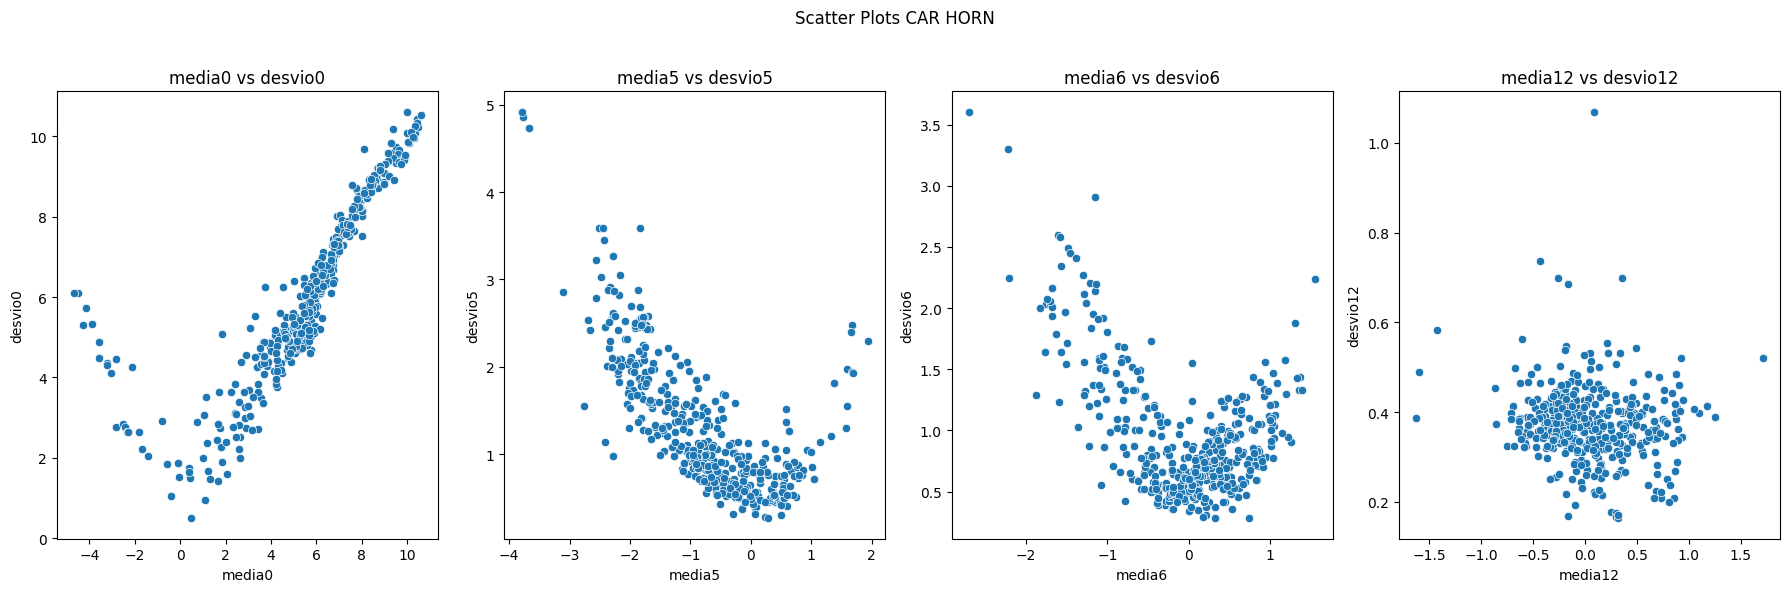

In [7]:
# Plot scatter plots for numerical variables vs charges
fig, axes = plt.subplots(1, 4, figsize=(18, 6))
fig.suptitle('Scatter Plots CAR HORN')

sns.scatterplot(x='media0', y='desvio0', data=df_car_horn, ax=axes[0])
axes[0].set_title('media0 vs desvio0')

sns.scatterplot(x='media5', y='desvio5', data=df_car_horn, ax=axes[1])
axes[1].set_title('media5 vs desvio5')

sns.scatterplot(x='media6', y='desvio6', data=df_car_horn, ax=axes[2])
axes[2].set_title('media6 vs desvio6')

sns.scatterplot(x='media12', y='desvio12', data=df_car_horn, ax=axes[3])
axes[3].set_title('media12 vs desvio12')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

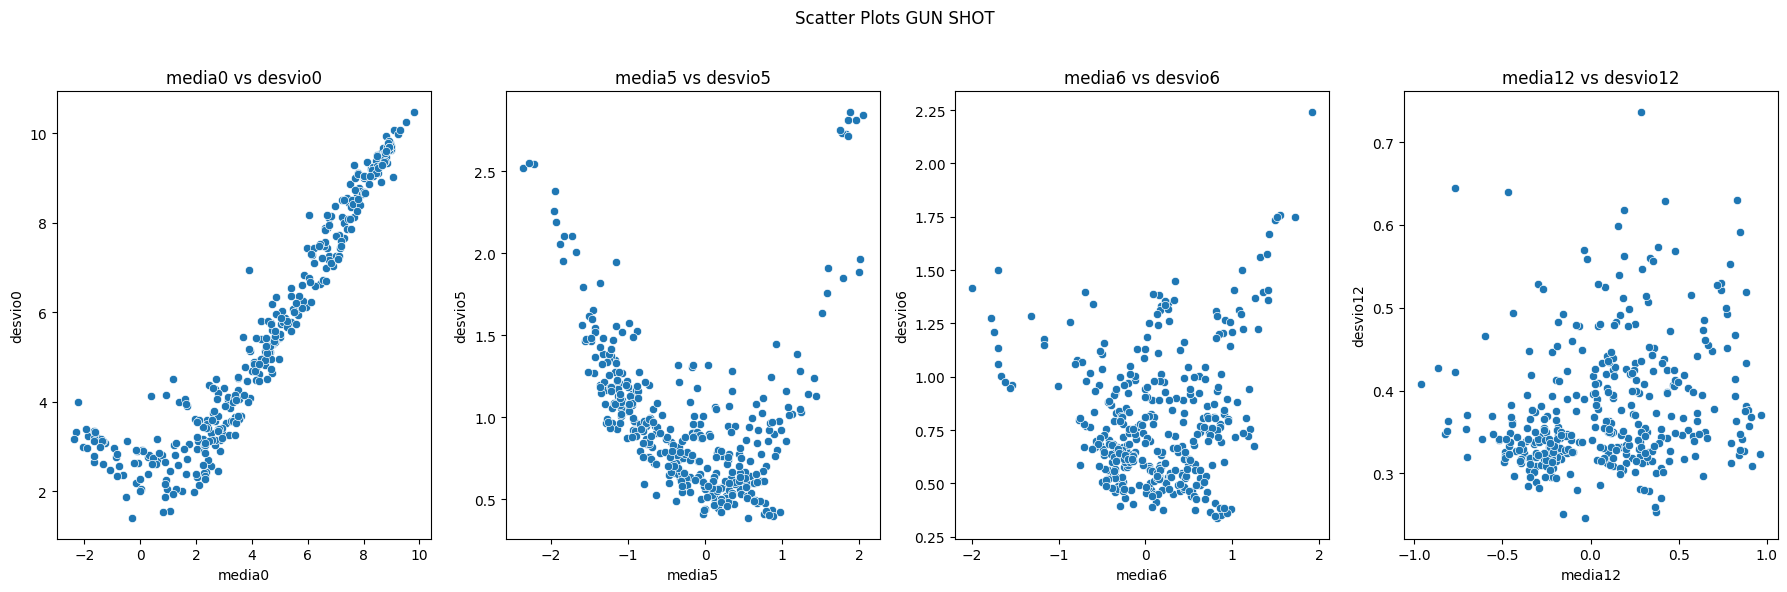

In [8]:
# Plot scatter plots for numerical variables vs charges
fig, axes = plt.subplots(1, 4, figsize=(18, 6))
fig.suptitle('Scatter Plots GUN SHOT')

sns.scatterplot(x='media0', y='desvio0', data=df_gun_shot, ax=axes[0])
axes[0].set_title('media0 vs desvio0')

sns.scatterplot(x='media5', y='desvio5', data=df_gun_shot, ax=axes[1])
axes[1].set_title('media5 vs desvio5')

sns.scatterplot(x='media6', y='desvio6', data=df_gun_shot, ax=axes[2])
axes[2].set_title('media6 vs desvio6')

sns.scatterplot(x='media12', y='desvio12', data=df_gun_shot, ax=axes[3])
axes[3].set_title('media12 vs desvio12')

plt.tight_layout(rect=[0, 0, 1, 0.96])

<Axes: >

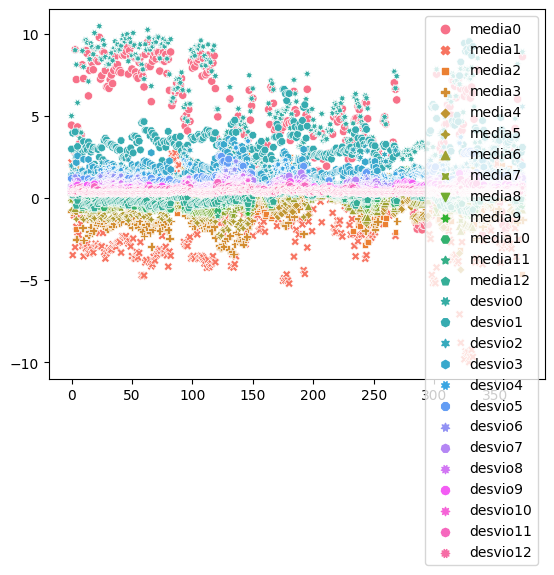

In [9]:
sns.scatterplot(data=df_gun_shot)

<Axes: >

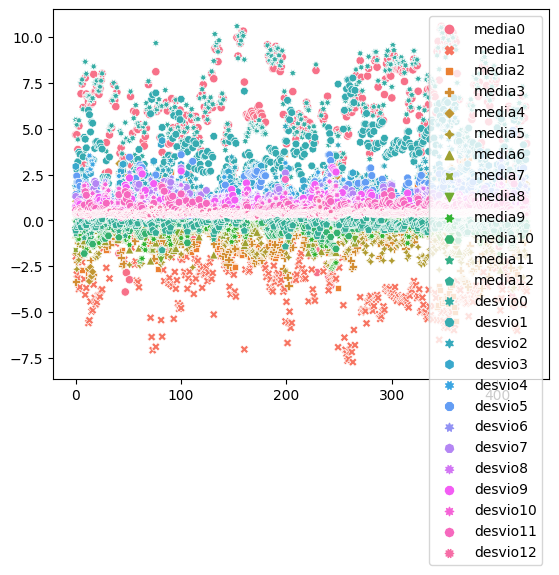

In [10]:
sns.scatterplot(data=df_car_horn)

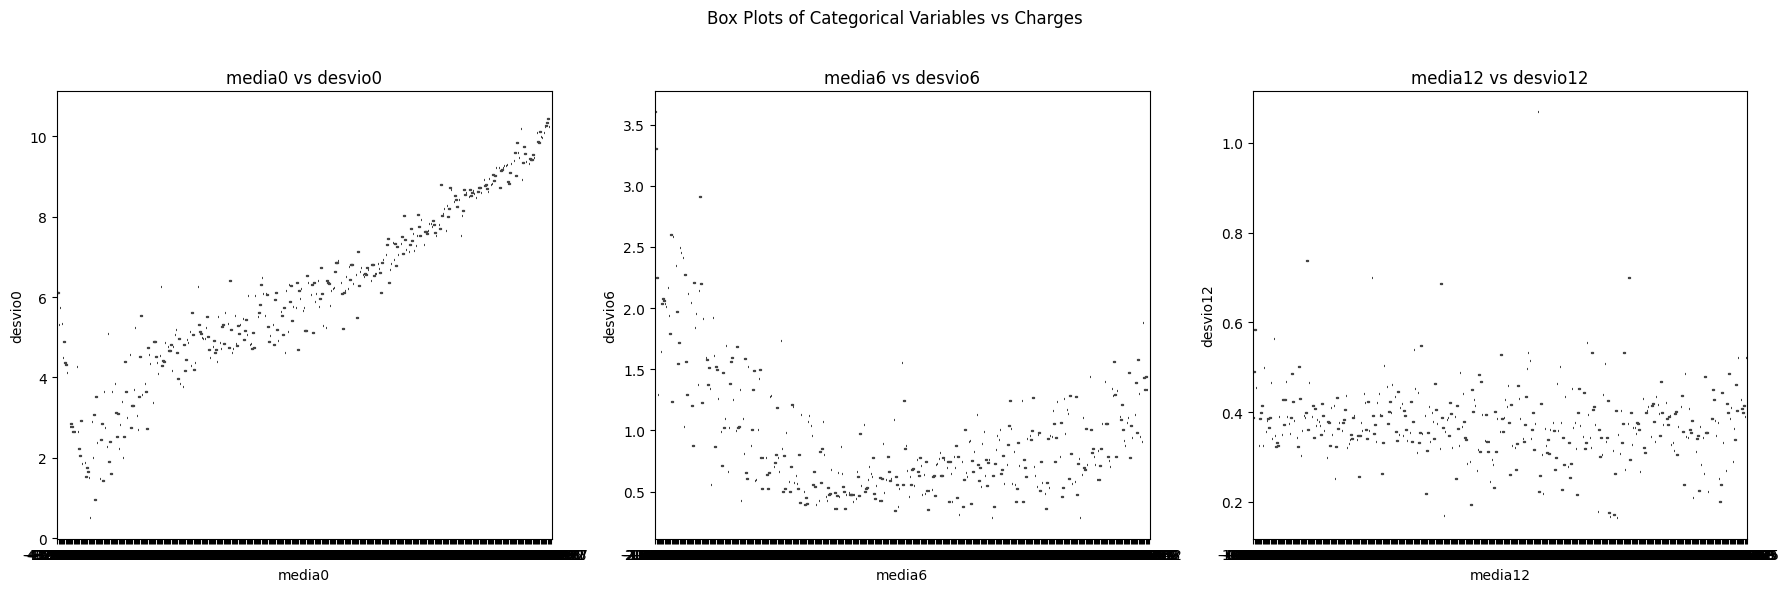

In [11]:
# Plot box plots for categorical variables vs charges
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Box Plots of Categorical Variables vs Charges')

sns.boxplot(x='media0', y='desvio0', data=df_car_horn, ax=axes[0])
axes[0].set_title('media0 vs desvio0')

sns.boxplot(x='media6', y='desvio6', data=df_car_horn, ax=axes[1])
axes[1].set_title('media6 vs desvio6')

sns.boxplot(x='media12', y='desvio12', data=df_car_horn, ax=axes[2])
axes[2].set_title('media12 vs desvio12')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

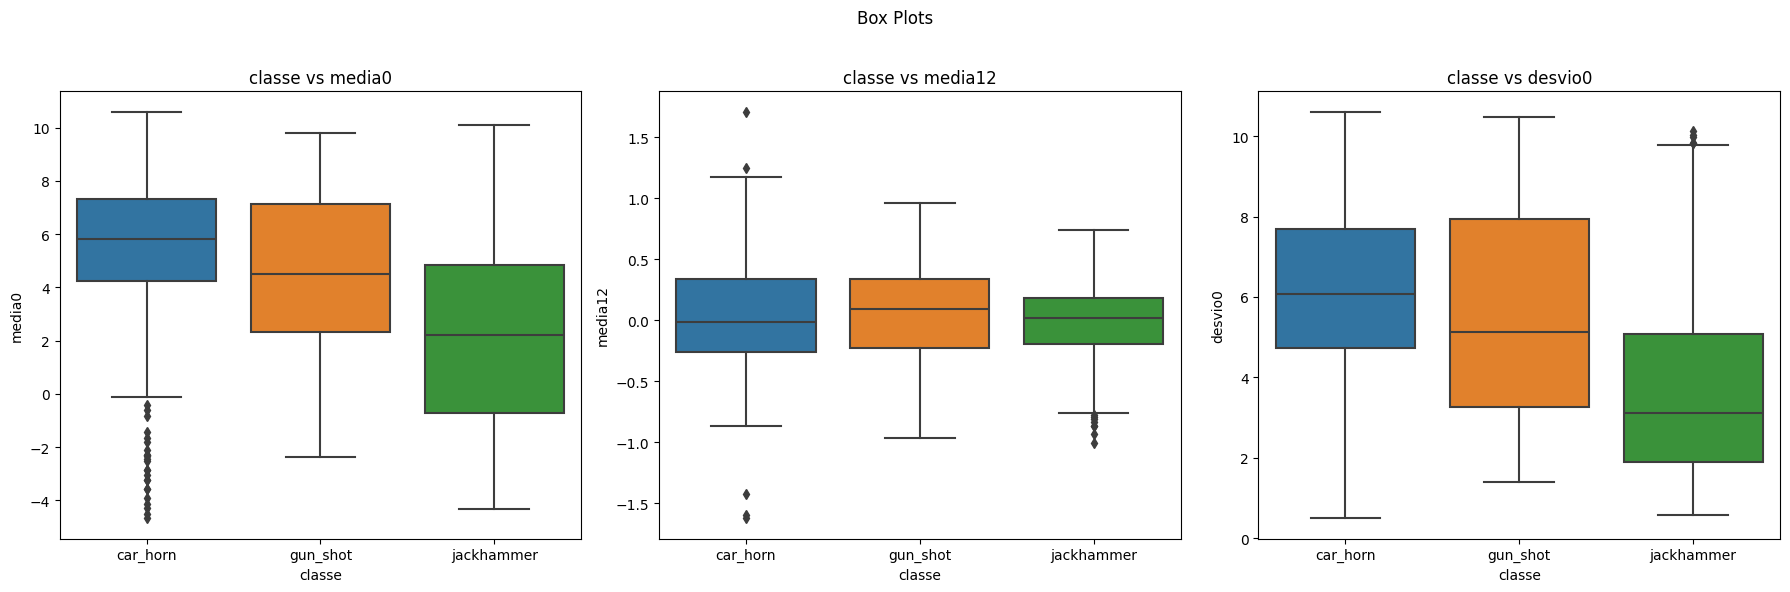

In [12]:
df = pd.read_csv('all.csv')

# Plot box plots for categorical variables vs charges
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Box Plots')

sns.boxplot(x='classe', y='media0', data=df, ax=axes[0])
axes[0].set_title('classe vs media0')

sns.boxplot(x='classe', y='media12', data=df, ax=axes[1])
axes[1].set_title('classe vs media12')

sns.boxplot(x='classe', y='desvio0', data=df, ax=axes[2])
axes[2].set_title('classe vs desvio0')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 2. Methods Application
Consider using the following methods: Logistic Regression, Linear Discriminant Analysis (LDA)
and Quadratic Discriminant Analysis (QDA). Applying the methods to the chosen data, try to
decide which method is most appropriate for the problem, giving reasons for your choice. Use the
following resampling methods for the various suggested models: <br>
• Holdout<br>
• Cross Validation (with k = 5 and k = 10)<br>
• Leave One Out Cross Validation (LOOCV)<br>
• Bootstrap<br>
Use the evaluation metrics that you find most appropriate to evaluate the results obtained
in each experiment. Analyzing the results obtained, indicate how the variance is affected by the
resampling methods used.

## Logistic Regression

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

In [310]:
from sklearn.impute import SimpleImputer

def plot_classifier_boundary(model,X,h = .05):
    
    # X = X.iloc[:,:-1].values
    # print(type(X))
    # print(X)
    # #X = X.to_numpy()
    print(type(X))
    print(X)
    #imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
    #imputer = imputer.fit(X.iloc[:, 1:3])
    #X.iloc[:, 1:3] = imputer.transform(X.iloc[:, 1:3])
    # this function can be used with any sklearn classifier
    # ready for two classes but can be easily extended - we need 3!!!!
    cmap_light = colors.ListedColormap(['lightsteelblue', 'peachpuff', 'pink'])
    x_min, x_max = X[:, 0].min()-.2, X[:, 0].max()+.2
    y_min, y_max = X[:, 1].min()-.2, X[:, 1].max()+.2
    # generate a grid with step h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    # the method ravel flattens xx and yy
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.xlim((x_min,x_max))
    plt.ylim((y_min,y_max))

In [284]:
def logistic_regression(X, y):
    cmap = colors.ListedColormap(['blue','orange', 'purple'])
    #logr=LogisticRegression().fit(X,y)
    logr = LogisticRegression()
    # logr_model = logr.fit(X, y.values.ravel())
    logr_model = logr.fit(X, y)

    r_sq = logr.score(X, y)
    print(f"coefficient of determination: {r_sq}")

    print ('Slope: ', logr_model.coef_)
    print ('Intercept: ',logr_model.intercept_)

    plot_classifier_boundary(logr,X)
    plt.scatter(X[:,0],X[:,1],color=cmap(y))
    plt.title('Logistic regression')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

In [301]:
df = pd.read_csv('all.csv')

In [171]:
# # car horn = 0, gunshot =1, jackhammer = 2
# df['classe'].mask(df['classe'] == 'car_horn', 0, inplace=True)
# df['classe'].mask(df['classe'] == 'gun_shot', 1, inplace=True)
# df['classe'].mask(df['classe'] == 'jackhammer', 2, inplace=True)

In [188]:
df.head(3)

,media0,media1,media2,media3,media4,media5,media6,media7,media8,media9,...,desvio4,desvio5,desvio6,desvio7,desvio8,desvio9,desvio10,desvio11,desvio12,classe
0,4.677986,-1.966398,1.688301,-3.354441,1.043490,-1.798730,-0.767414,-1.614851,-0.185658,-0.029143,...,1.890468,1.410196,0.803002,1.311613,0.601646,0.769883,0.416295,0.564592,0.349746,car_horn
1,4.677564,-2.953498,1.426739,-2.261733,0.930528,-2.665626,-0.332971,-0.714048,0.139587,-0.898208,...,1.472251,2.427163,0.554742,0.577265,0.766374,0.758806,0.532139,0.454760,0.376218,car_horn
2,3.872289,-3.173699,1.931834,-1.202015,0.610031,-2.204595,-0.295343,-0.319409,-0.161939,-1.040936,...,1.159666,2.092606,0.540943,0.634752,0.439129,1.018796,0.385876,0.508423,0.394474,car_horn


In [302]:
print(type(df.media0[0]))
print(type(df.classe[0]))

<class 'numpy.float64'>
<class 'str'>


In [312]:
x = df[['media12']]
y = df['classe']


In [313]:
print(x.shape, type(x))
print(y.shape, type(y))

(1803, 1) <class 'pandas.core.frame.DataFrame'>
(1803,) <class 'pandas.core.series.Series'>


In [314]:
y

0         car_horn
1         car_horn
2         car_horn
3         car_horn
4         car_horn
           ...    
1798    jackhammer
1799    jackhammer
1800    jackhammer
1801    jackhammer
1802    jackhammer
Name: classe, Length: 1803, dtype: object

In [315]:
x = x.values
y= y.values

In [316]:
print(x.shape, type(x))
print(y.shape, type(y))

(1803, 1) <class 'numpy.ndarray'>
(1803,) <class 'numpy.ndarray'>


In [317]:
logistic_regression(X=x, y=y)

coefficient of determination: 0.5546311702717692
Slope:  [[ 0.02646515]
 [ 0.31382742]
 [-0.34029257]]
Intercept:  [-0.23288746 -0.38735042  0.62023788]
<class 'numpy.ndarray'>
[[-0.550976]
 [-0.361923]
 [-0.250745]
 ...
 [ 0.000949]
 [ 0.005052]
 [-0.242188]]


IndexError: index 1 is out of bounds for axis 1 with size 1

## Linear Discriminant Analysis (LDA)

In [227]:
def lda(X,y):
    cmap = colors.ListedColormap(['blue','orange'])
    #logr=LogisticRegression().fit(X,y)
    logr = LDA()
    logr_model = logr.fit(X, y)

    r_sq = logr.score(X, y)
    print(f"coefficient of determination: {r_sq}")

    print ('Slope: ', logr_model.coef_)
    print ('Intercept: ',logr_model.intercept_)

    # plot_classifier_boundary(logr,X)
    # plt.scatter(X[:,0],X[:,1],color=cmap(y))
    # plt.title('Logistic regression')
    # plt.xlabel('$x_1$')
    # plt.ylabel('$x_2$')

lda(x, y)

coefficient of determination: 0.5546311702717692
Slope:  [[ 0.1424037]
 [ 0.4394888]
 [-0.22546  ]]
Intercept:  [-1.44041988 -1.59561912 -0.58730352]


## Quadratic Discriminant Analysis (QDA)

In [230]:
def qda(X, y):
    cmap = colors.ListedColormap(['blue','orange'])
    #logr=LogisticRegression().fit(X,y)
    logr = QDA()
    logr_model = logr.fit(X, y)

    r_sq = logr.score(X, y)
    print(f"coefficient of determination: {r_sq}")

    # plot_classifier_boundary(logr,X)
    # plt.scatter(X[:,0],X[:,1],color=cmap(y))
    # plt.title('Logistic regression')
    # plt.xlabel('$x_1$')
    # plt.ylabel('$x_2$')

qda(X=x, y=y)

coefficient of determination: 0.5734886300610095


## Multiple Linear Regression
https://medium.com/machine-learning-with-python/multiple-linear-regression-implementation-in-python-2de9b303fc0c

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('all.csv')

In [62]:
# car horn = 0, gunshot =1, jackhammer = 2
df['classe'].mask(df['classe'] == 'car_horn', 0, inplace=True)
df['classe'].mask(df['classe'] == 'gun_shot', 1, inplace=True)
df['classe'].mask(df['classe'] == 'jackhammer', 2, inplace=True)

In [63]:
df.head(5)

,media0,media1,media2,media3,media4,media5,media6,media7,media8,media9,...,desvio4,desvio5,desvio6,desvio7,desvio8,desvio9,desvio10,desvio11,desvio12,classe
0,4.677986,-1.966398,1.688301,-3.354441,1.043490,-1.798730,-0.767414,-1.614851,-0.185658,-0.029143,...,1.890468,1.410196,0.803002,1.311613,0.601646,0.769883,0.416295,0.564592,0.349746,0
1,4.677564,-2.953498,1.426739,-2.261733,0.930528,-2.665626,-0.332971,-0.714048,0.139587,-0.898208,...,1.472251,2.427163,0.554742,0.577265,0.766374,0.758806,0.532139,0.454760,0.376218,0
2,3.872289,-3.173699,1.931834,-1.202015,0.610031,-2.204595,-0.295343,-0.319409,-0.161939,-1.040936,...,1.159666,2.092606,0.540943,0.634752,0.439129,1.018796,0.385876,0.508423,0.394474,0
3,5.160424,-3.750595,2.151555,-1.886166,1.334776,-2.151562,-0.546990,-0.359816,0.054898,-1.013008,...,1.627613,2.086991,0.654731,0.591023,0.497059,0.950790,0.567042,0.393286,0.332839,0
4,2.252624,-3.644894,1.939464,-1.974539,1.823046,-1.844794,-1.132419,-0.942162,0.582952,-0.769522,...,2.167108,1.868980,1.226150,1.161215,1.018720,0.892772,0.453530,0.655595,0.546549,0


In [64]:
df.describe()

,media0,media1,media2,media3,media4,media5,media6,media7,media8,media9,...,desvio3,desvio4,desvio5,desvio6,desvio7,desvio8,desvio9,desvio10,desvio11,desvio12
count,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,...,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000
mean,3.495076,-2.184187,1.073255,-0.698825,0.455421,-0.364949,0.287642,0.002218,0.228245,-0.124225,...,1.210243,1.095423,0.908105,0.852591,0.728579,0.674253,0.647240,0.578561,0.553523,0.356440
std,3.605594,1.792660,1.425874,0.954231,0.904173,0.801812,0.731956,0.645442,0.515347,0.523789,...,0.628151,0.552409,0.544199,0.438909,0.346493,0.289774,0.300969,0.251892,0.239224,0.066549
min,-4.672307,-9.984891,-5.472591,-4.068377,-4.362307,-3.794095,-2.701501,-1.856276,-2.150302,-2.626062,...,0.334159,0.295266,0.265892,0.280354,0.280959,0.136682,0.267503,0.190234,0.176745,0.163466
25%,0.401549,-3.338016,0.517790,-1.269979,-0.105763,-0.866011,-0.110261,-0.397775,-0.132682,-0.408994,...,0.745493,0.625401,0.545898,0.536299,0.489104,0.460650,0.462194,0.412720,0.388282,0.315536
50%,3.897727,-2.127124,1.070444,-0.717425,0.528501,-0.334075,0.367085,-0.010347,0.248138,-0.135857,...,1.072896,1.024874,0.753169,0.738506,0.622663,0.590892,0.570859,0.515397,0.484400,0.343735
75%,6.220131,-1.201787,1.952195,-0.131011,1.133396,0.188993,0.767006,0.394905,0.589735,0.170755,...,1.517922,1.464322,1.073476,1.030323,0.855334,0.806172,0.745861,0.666146,0.635796,0.380651
max,10.602967,2.943808,4.826087,2.914812,3.156123,2.050018,2.381640,2.096199,2.274243,1.788323,...,4.357339,3.719680,4.920654,3.605649,2.860202,1.935464,2.905896,2.263505,2.240934,1.069302


### For means

In [66]:
x = df[['media0','media1', 'media2', 'media3', 'media4', 'media5','media6', 'media7', 'media8', 'media9', 'media10', 'media11', 'media12']]
y = df['classe']

In [67]:
#Splitting the dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [68]:
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [69]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  1.4693002251458214
Coefficients:


[('media0', -0.03304629463692754),
 ('media1', 0.08542237987384954),
 ('media2', 0.248404412698254),
 ('media3', -0.016562194186804616),
 ('media4', -0.31801938503528643),
 ('media5', 0.25532635875788023),
 ('media6', 0.2822388882060078),
 ('media7', -0.21768123323201427),
 ('media8', 0.011165948818524375),
 ('media9', -0.054637811694603994),
 ('media10', 0.2115549379095932),
 ('media11', -0.5996463923947668),
 ('media12', -0.0652032839746377)]

Regression Equation: Classe =  1.4693 + (-0.0330 * media0) + (0.0854 * media1) + (0.2484 * media2) + (and so on...) + e

In [70]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 0.30545303  2.01450628  1.57752736  0.32335249  1.87493489  1.01094457
  1.35506924  1.61175013  1.50641799 -0.06785388  2.18647524  2.1627917
  1.51160612  1.94883825  0.37285524  0.50699946  1.52797199  0.53476727
  1.60925356  0.78761156  1.21453524  1.3647166   2.57774816  1.32236215
  0.41670426  2.07736747  1.99358415  1.46408988  1.91388879 -0.3009476
  1.26737006  1.37884007 -0.20637774 -0.80815743  1.5866618   2.2273639
  1.76804291 -0.67341809 -0.22098051  1.77865133  2.19525868  2.38606396
  0.19570415  1.73798918  1.08516729  1.90027499  1.96888043  1.37064363
  1.8359154   1.94159959  1.84851196  1.32810361  0.20012389  1.15736958
  1.57369674  1.9231152   0.9749981   1.60285398  1.72229412  1.64887804
  0.8152193   2.05295786  2.20641092  1.01297066  2.1915315   0.66484316
  1.7272781   0.73776341 -0.75427277  1.18061911  1.15087695  0.84976339
  0.80951923  1.22244396  0.21815605  1.55811442  1.3175717   1.04806818
 -0.86465723  1.46328675  0.8

In [73]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head(10)

,Actual value,Predicted value
134,0,0.305453
1390,2,2.014506
845,2,1.577527
31,0,0.323352
953,2,1.874935
996,2,1.010945
533,1,1.355069
1109,2,1.611750
57,0,1.506418
176,0,-0.067854


In [80]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 61.52
Mean Absolute Error: 0.3982217462597216
Mean Square Error: 0.253586120590444
Root Mean Square Error: 0.503573351747731


## 3. Feature Selection
Can classification models obtain better results if they use just a few features instead of all available
features? Evaluate this hypothesis, using regularization methods.

## 4. Learning a non-linear function
Use Generalized Additive Models (GAMs) to perform binary classification of your dataset. To do
this, you must try to build a model that allows you, among the three classes under analysis, to
identify one of them. You should test the three hypotheses and present only the one with the best
results. To validate the performance of the models, use cross-validation. Evaluate the results using
the evaluation metrics that you consider appropriate.